<a href="https://colab.research.google.com/github/winengewe/Holistic-Health-Lifestyle-Prediction/blob/main/Holistic_Health_Lifestyle_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. import libraries
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# read in all the add on modules to allow for data manipulation and visualisation

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# 2.Load and view the data
df=pd.read_csv("gdrive/My Drive/GC NPA AI 2025/holistic_health_lifestyle_dataset.csv")
print('Data Info')
print(df.info())
print('\nData Head (First5rows)')
print(df.head())
print('\nData Tail (Last5rows)')
print(df.tail())
print('\nData Describe')
print(df.describe())

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Physical_Activity     10000 non-null  float64
 1   Nutrition_Score       10000 non-null  float64
 2   Stress_Level          10000 non-null  float64
 3   Mindfulness           10000 non-null  float64
 4   Sleep_Hours           10000 non-null  float64
 5   Hydration             10000 non-null  float64
 6   BMI                   10000 non-null  float64
 7   Alcohol               10000 non-null  float64
 8   Smoking               10000 non-null  float64
 9   Overall_Health_Score  10000 non-null  float64
 10  Health_Status         10000 non-null  object 
dtypes: float64(10), object(1)
memory usage: 859.5+ KB
None

Data Head (First5rows)
   Physical_Activity  Nutrition_Score  Stress_Level  Mindfulness  Sleep_Hours  \
0          54.934283         5.643011      5.696572   

In [ ]:
# 3.Check the file and Clean if needed
print("\nMissing values:\n", df.isnull().sum()) # Show the total of missing values for each column
df = df.dropna() # Drop rows with missing values
print("\nAfter dropping rows:\n", df.isnull().sum())


Missing values:
 Physical_Activity       0
Nutrition_Score         0
Stress_Level            0
Mindfulness             0
Sleep_Hours             0
Hydration               0
BMI                     0
Alcohol                 0
Smoking                 0
Overall_Health_Score    0
Health_Status           0
dtype: int64

After dropping rows:
 Physical_Activity       0
Nutrition_Score         0
Stress_Level            0
Mindfulness             0
Sleep_Hours             0
Hydration               0
BMI                     0
Alcohol                 0
Smoking                 0
Overall_Health_Score    0
Health_Status           0
dtype: int64


In [ ]:
# 4.Check for correlations
df.corr(numeric_only=True)

,Physical_Activity,Nutrition_Score,Stress_Level,Mindfulness,Sleep_Hours,Hydration,BMI,Alcohol,Smoking,Overall_Health_Score
Physical_Activity,1.000000,-0.008942,0.023377,-0.011513,-0.009958,-0.021959,-0.016279,-0.021592,0.004774,0.146014
Nutrition_Score,-0.008942,1.000000,0.027171,0.014820,-0.003984,0.000604,-0.009665,0.001983,-0.003347,0.385678
Stress_Level,0.023377,0.027171,1.000000,0.001435,0.008659,-0.004224,-0.000406,-0.013165,-0.001170,-0.129315
Mindfulness,-0.011513,0.014820,0.001435,1.000000,0.008517,-0.008026,0.014029,0.017807,0.005669,0.715856
Sleep_Hours,-0.009958,-0.003984,0.008659,0.008517,1.000000,-0.010928,0.008973,0.002004,0.001971,0.171856
Hydration,-0.021959,0.000604,-0.004224,-0.008026,-0.010928,1.000000,-0.002795,0.013731,0.013585,0.142044
BMI,-0.016279,-0.009665,-0.000406,0.014029,0.008973,-0.002795,1.000000,0.005597,-0.001867,-0.160278
Alcohol,-0.021592,0.001983,-0.013165,0.017807,0.002004,0.013731,0.005597,1.000000,-0.023092,-0.174725
Smoking,0.004774,-0.003347,-0.001170,0.005669,0.001971,0.013585,-0.001867,-0.023092,1.000000,-0.294431
Overall_Health_Score,0.146014,0.385678,-0.129315,0.715856,0.171856,0.142044,-0.160278,-0.174725,-0.294431,1.000000


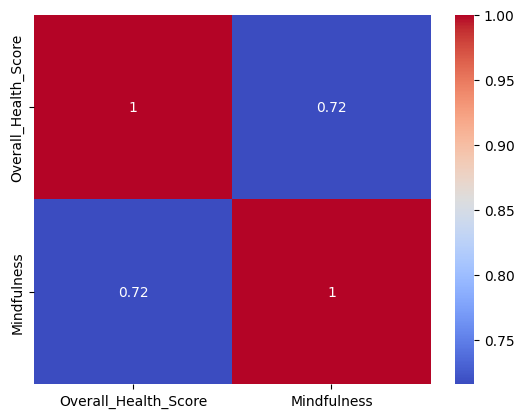

In [ ]:
# 5.Visualise the data correlations between Overall Health Score and appropriate data columns
sns.heatmap(df[['Overall_Health_Score','Mindfulness']].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# 6.What is most correlated with tsunami?
# Mindfulness

In [ ]:
# 7.Prepare datasets for a machine learning model.
# Create a numpy array called 'x' for the identified feature and one called 'y' for 'Overall Health Score'.
x=df[['Mindfulness']].to_numpy()
y=df[['Overall_Health_Score']].to_numpy()

In [ ]:
# 8.Split these x and y numpy arrays into training and testing sets. Use a 80%/20% split
split=int(0.8*len(df)) # find a 80% value so we can use to split data nto Train & Test
x_train=x[:split] # split data to create training set from start of data to 80%
y_train=y[:split] # split data to create training set from start of data to 80%
x_test=x[split:]  # split data to create test set from 80% to end of data
y_test=y[split:]  # split data to create test set from 80% to end of data

In [ ]:
# 9.Fit the LinearRegression model from SKLearn to the above training set
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [ ]:
# 10.Use the LinearRegression model's score()
print("Train model score: ",model.score(x_train,y_train))
print("Test model score: ",model.score(x_test,y_test))
#poor test scores showing very low and no link between x and y

Train model score:  0.5121335645336895
Test model score:  0.5121964974478923


In [ ]:
# 11.Use the LinearRegression model's predict() method
y_pred_test = model.predict(x_test)
y_pred_train = model.predict(x_train)

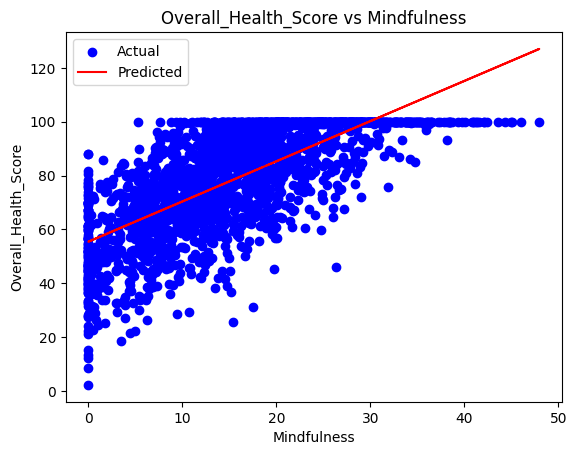

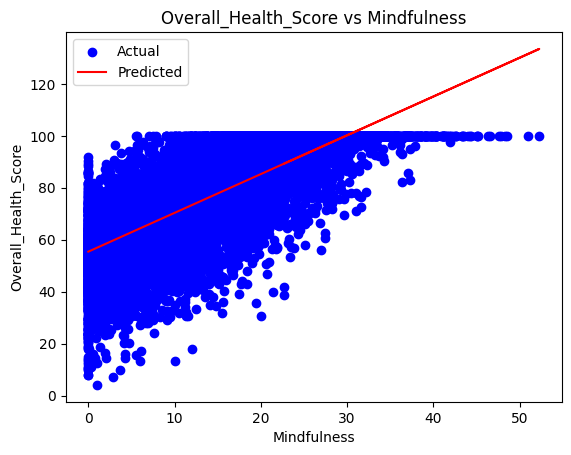

In [ ]:
# 12.Use matplotlib to visualise the performance on both the training and testing sets
plt.title("Overall_Health_Score vs Mindfulness")
plt.xlabel("Mindfulness")
plt.ylabel("Overall_Health_Score")
plt.scatter(x_test,y_test,color='blue')
plt.plot(x_test,y_pred_test,color='red')
plt.legend(['Actual','Predicted'])
plt.show()

plt.title("Overall_Health_Score vs Mindfulness")
plt.xlabel("Mindfulness")
plt.ylabel("Overall_Health_Score")
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,y_pred_train,color='red')
plt.legend(['Actual','Predicted'])
plt.show()

# Part 2

In [ ]:
# 1.Create a numpy multi-dimensional array called 'x' for the all the features in the dataset
# and again one called 'y' for 'Overall Health Score'.
x = df.drop(columns=['Overall_Health_Score','Health_Status']).to_numpy() # set the x values as all except tsunami
y=df[['Overall_Health_Score']].to_numpy()

In [ ]:
# 2.Split these x and y numpy arrays into training and testing sets. Use a 80%/20% split again.
split=int(0.8*len(df)) # find a 80% value so we can use to split data nto Train & Test
x_train=x[:split] # split data to create training set from start of data to 80%
y_train=y[:split] # split data to create training set from start of data to 80%
x_test=x[split:]  # split data to create test set from 80% to end of data
y_test=y[split:]  # split data to create test set from 80% to end of data

In [ ]:
# 3.Fit the RandomForestRegressor model from SKLearn to the above training set
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(x_train,y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [ ]:
# 4.Use the RandomForestRegressor model's score() method
print("Train model score: ",model.score(x_train,y_train))
print("Test model score: ",model.score(x_test,y_test))

Train model score:  0.9894305884471501
Test model score:  0.9251819710083787


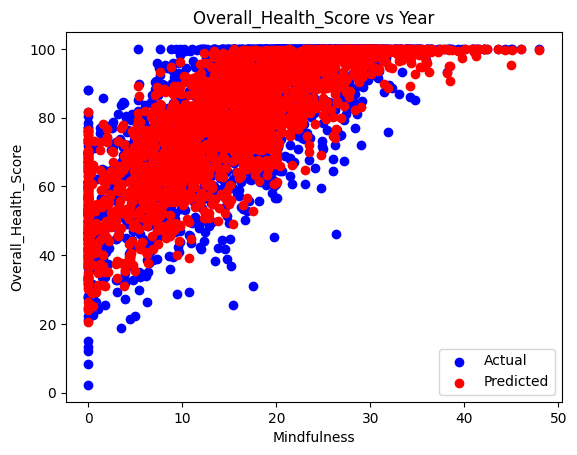

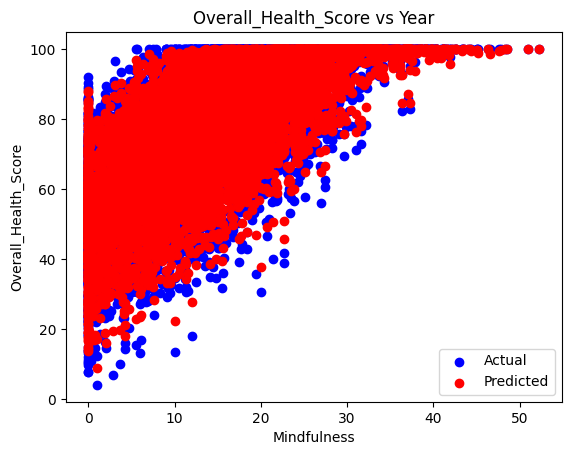

In [ ]:
# 5.Use the RandomForestRegressor model's predict() method
# and matplotlib to visualise the performance on both the training and testing sets
y_pred_train=model.predict(x_train)
y_pred_test=model.predict(x_test)

plt.scatter(x_test[:,3],y_test,color='blue')
plt.scatter(x_test[:,3],y_pred_test,color='red')
plt.title("Overall_Health_Score vs Year")
plt.xlabel("Mindfulness")
plt.ylabel("Overall_Health_Score")
plt.legend(['Actual','Predicted'])
plt.show()

plt.scatter(x_train[:,3],y_train,color='blue')
plt.scatter(x_train[:,3],y_pred_train,color='red')
plt.title("Overall_Health_Score vs Year")
plt.xlabel("Mindfulness")
plt.ylabel("Overall_Health_Score")
plt.legend(['Actual','Predicted'])
plt.show()


# Part 3

Explain the results from the Linear Regression and Random Forest models.

**Which had the best the performance on the training set?**

Ans:Random Forest Regression model

**Which had the best performance on the test set?**

Ans:Random Forest Regression model

**Which model would you use for making 'tsunami' predictions?**

Ans:Random Forest Regression model

**Why that model ?**

Ans: Compared to Linear Regression charts, DecisionTree Regressor charts are better. The model is more visually appealing as the points are more widely distributed.

The model shows that there is more links between the tsunami and Year, leads to a higher model score.

**The best prediction on Test & Train is the Random Forest as the Linear regression values do not match at all & scoring is very poor.**

**Would recommend the Random Forest model as score & visualisation are very good**